# EMEPy Eigenmode Solvers

Now solving for the FD eigenmode...
Now plotting the index of refraction profile for the FD solver


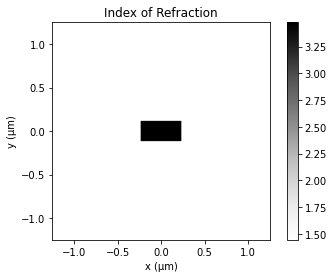

Now plotting the field profile for the FD solver


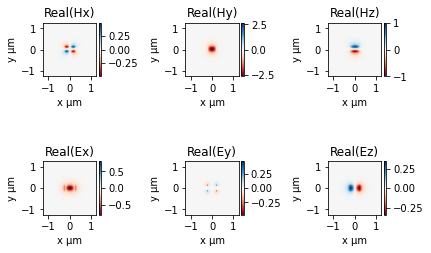

FD Solver Effective index:  (2.353569142572911-2.5967889488647263e-10j)
Now setting up the ANN...


/home/ihammond/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Now solving for the ANN eigenmode...
Now plotting the index of refraction profile for the ANN solver


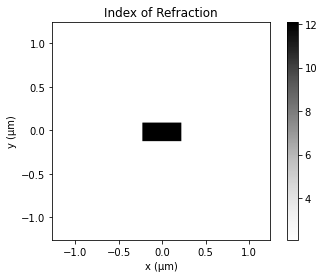

Now plotting the field profile for the ANN solver


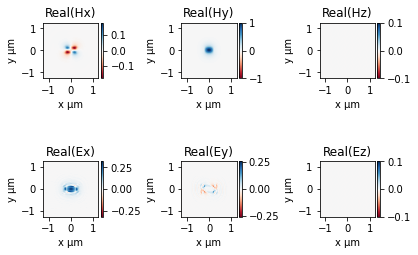

ANN Solver Effective index:  2.3720648288726807


In [1]:
"""
    This script simulates eigenmodes using both the Electromagnetic Python Eigenmode Solver (EMpy) and the EMEPy neural networks.

    Note if an error occurs in EMpy's backend (Electromagnetic Python) Do one of the following:
        1) Reinstall electromagnetic python (EMpy) from GitHub source and add to path using "pip install -e ." in the EMpy directory
        2) Enter EMpy/modesolvers/FD.py and change line 1369 from 
            "    nlayers *= numpy.ones(4)"                  to
            "    nlayers *= numpy.ones(4, dtype=int)"

"""

# Import the needed libraries and modules
from emepy import MSEMpy  # Open source
from emepy.ann import ANN, MSNeuralNetwork
import numpy as np
from matplotlib import pyplot as plt


########### Finite Difference Solver ##############

# Create a modesolver object that represents a waveguide cross section
fd_solver = MSEMpy(
    1.55e-6,  # Set the wavelength of choice
    0.46e-6,  # Define the width of the waveguide
    0.22e-6,  # Define the thickness of the waveguide
    mesh=128,  # Set the mesh density
    num_modes=1,  # Set the number of modes to solve for
    cladding_width=2.5e-6,  # Define the cladding width (default is same as ANN)
    cladding_thickness=2.5e-6,  # Define the cladding thickness (default is same as ANN)
    core_index=None,  # Define the core refractive index (leave None (default) for Silicon)
    cladding_index=None,  # Define the cladding refractive index (leave None (default) for Silicon Dioxide)
)

# Solve for the fundamental Eigenmode
print("Now solving for the FD eigenmode...")
fd_solver.solve()
fd_mode = fd_solver.get_mode()

# Plot the refractive index
print("Now plotting the index of refraction profile for the FD solver")
plt.figure()
fd_mode.plot_material()
plt.show()

# Plot the eigenmode field components
print("Now plotting the field profile for the FD solver")
plt.figure()
fd_mode.plot()
plt.show()

# Look at the effective index neff
print("FD Solver Effective index: ", fd_mode.get_neff())

########### ANN Solver ##############

# Initialize the neural networks
# This step takes a little while to perform but only needs to happen once and then all modesolvers can use it
print("Now setting up the ANN...")
ann = ANN()

# Create a modesolver object that represents a waveguide cross section
ann_solver = MSNeuralNetwork(
    ann,  # Our initialized neural network modesolver
    1.55e-6,  # Set the wavelength of choice
    0.46e-6,  # Define the width of the waveguide
    0.22e-6,  # Define the thickness of the waveguide
)

# Solve for the fundamental Eigenmode
print("Now solving for the ANN eigenmode...")
ann_solver.solve()
ann_mode = ann_solver.get_mode()

# Plot the refractive index
print("Now plotting the index of refraction profile for the ANN solver")
plt.figure()
ann_mode.plot_material()
plt.show()

# Plot the eigenmode field components
print("Now plotting the field profile for the ANN solver")
plt.figure()
ann_mode.plot()
plt.show()

# Look at the effective index neff
print("ANN Solver Effective index: ", ann_mode.get_neff())
